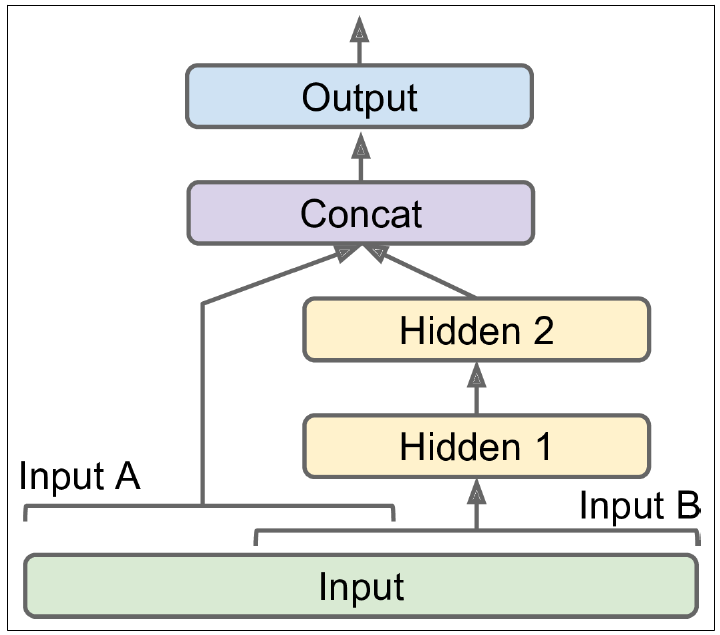

In [1]:
from IPython.display import Image
Image("img/n_dnn_regression.png")

In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow import keras

In [3]:
# Upload the data
housing = fetch_california_housing()

In [4]:
housing.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [5]:
housing.target_names

['MedHouseVal']

Preparing the data

In [6]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)

In [7]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

Scaling the data

In [8]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

In [9]:
print('X_train_scaled shape is:', X_train_scaled.shape)
print('X_valid_scaled shape is:', X_valid_scaled.shape)
print('X_test_scaled shape is:', X_test_scaled.shape)
print('y_train shape is:', y_train.shape)
print('y_valid shape is:', y_valid.shape)
print('y_test shape is:', y_test.shape)

X_train_scaled shape is: (11610, 8)
X_valid_scaled shape is: (3870, 8)
X_test_scaled shape is: (5160, 8)
y_train shape is: (11610,)
y_valid shape is: (3870,)
y_test shape is: (5160,)


In [10]:
print('X_train_scaled type is:', X_train_scaled.dtype)
print('X_valid_scaled type is:', X_valid_scaled.dtype)
print('X_test_scaled type is:', X_test_scaled.dtype)
print('y_train type is:', y_train.dtype)
print('y_valid type is:', y_valid.dtype)
print('y_test type is:', y_test.dtype)

X_train_scaled type is: float64
X_valid_scaled type is: float64
X_test_scaled type is: float64
y_train type is: float64
y_valid type is: float64
y_test type is: float64


Creating the model

In [11]:
# Send 5 features through the deep path
input_A = keras.layers.Input(shape=[5])

In [12]:
# Send 6 features through the wide path
input_B = keras.layers.Input(shape=[6])

In [13]:
# Creating hidden 1, it is similar a function
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)

In [14]:
# Creating hidden 2, it is similar a function
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)

In [15]:
# Concatenate input with hidden 2
concat = keras.layers.Concatenate()([input_A, hidden2])

In [16]:
# Creating the output
output = keras.layers.Dense(1)(concat)

In [17]:
# Creating the model
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

In [18]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 6)]          0           []                               
                                                                                                  
 dense (Dense)                  (None, 30)           210         ['input_2[0][0]']                
                                                                                                  
 input_1 (InputLayer)           [(None, 5)]          0           []                               
                                                                                                  
 dense_1 (Dense)                (None, 30)           930         ['dense[0][0]']                  
                                                                                              

In [19]:
# Compiling the model
model.compile(loss="mse", optimizer="sgd")

In [20]:
X_train_A, X_train_B = X_train_scaled[:, :5], X_train_scaled[:, 2:]
X_valid_A, X_valid_B = X_valid_scaled[:, :5], X_valid_scaled[:, 2:]

In [21]:
# Fitting the model
history = model.fit(x = (X_train_A, X_train_B), 
                    y = y_train,
                    epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.1581 - val_loss: 0.5503
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6245 - val_loss: 0.5129
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5211 - val_loss: 0.4750
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4715 - val_loss: 0.4455
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4443 - val_loss: 0.4224
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4269 - val_loss: 0.4093
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4138 - val_loss: 0.3995
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4041 - val_loss: 0.3904
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3951 - val_loss: 0.3872
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3877 - val_loss: 0.3749

In [22]:
X_test_A, X_test_B = X_test_scaled[:, :5], X_test_scaled[:, 2:]

In [23]:
# Evaluating the model
mse_test = model.evaluate((X_test_A, X_test_B), y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.3494


In [24]:
# Making predctions
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]
y_pred = model.predict((X_new_A, X_new_B)) 
y_pred

array([[4.3485146],
       [1.3040766],
       [1.3833303]], dtype=float32)

In [25]:
model.save('n_dnn_regression_model.h5')